## Import Libs

In [1]:
import os
import copy
import csv
import calendar
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt


from datetime import datetime
from pandas import Timestamp
from calendar import monthrange
from matplotlib.pyplot import figure
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Load Data

In [2]:
path0 = 'data/processed_ori0.csv'
path1 = 'data/processed_ori1.csv'
path2 = 'data/processed_ori2.csv'
path3 = 'data/processed_ori3.csv'

df = pd.read_csv(path0)
df = df.append(pd.read_csv(path1))
df = df.append(pd.read_csv(path2))
df = df.append(pd.read_csv(path3))

df.reset_index(inplace=True)

df.shape

(1010282, 10)

## Sample 

In [3]:
# sample

sample_comment = df['Comments'][174]
sample_ori = df['Ori_comments'][174]

sid_obj = SentimentIntensityAnalyzer()

print('comment: \n',sample_ori)
sample_comment_dict = sid_obj.polarity_scores(sample_comment) 
sample_ori_dict = sid_obj.polarity_scores(sample_ori)

print('processed comments: ', sample_comment_dict)
print('original comments: ', sample_ori_dict)

comment: 
 ['The vehicle was involved in fatality which was my brother, they cannot explain why the vehicle entered into a skid on a pretty straight part of the highway not sure if it was a powertrain issue as I did see a recall after I did some research following the accident. The other issue is the mechanism on how the driver safety belt attaches to the frame as that was damaged on first impact which caused my brother to be ejected. Something as important as a safety should not be compromised so easily. Los Angeles, CA, USA']
processed comments:  {'neg': 0.186, 'neu': 0.517, 'pos': 0.297, 'compound': 0.5267}
original comments:  {'neg': 0.109, 'neu': 0.754, 'pos': 0.137, 'compound': 0.2856}


In [4]:
df_vader = df.copy()
df_vader.drop(['index', 'Comments'], axis=1, inplace=True)

## Process and calculate Vader Score

In [5]:
# remove unuseful string

def remove_unuseful():
    reviews = []
    for i in range(df_vader.shape[0]):
        review = df_vader['Ori_comments'][i]
        review = review.replace('[', '')
        review = review.replace(']', '')
        par = review.split()[:-4]
        loc_rm_review = ' '.join(par)
        reviews.append(loc_rm_review)

    df_vader['Comments'] = reviews

remove_unuseful()

In [6]:
# generate vader score

def calculate_vader():
    vader_score = []
    for i in range(df_vader.shape[0]):
        temp_dict = sid_obj.polarity_scores(str(df_vader['Comments'][i]))
        vader_score.append(temp_dict)

    df_vader['V_score'] = vader_score

calculate_vader()
    
df_vader

,Make,Model,Year,Label,Date,Ori_comments,country,state,Comments,V_score
0,Acura,CL,2003,electrical,Apr 11 2019,"[""'The contact owns a 2003 Acura Cl. The conta...",usa,pa,"""'The contact owns a 2003 Acura Cl. The contac...","{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'comp..."
1,Acura,CL,2003,electrical,Jul 03 2012,['Car was parked outside during summer heatwav...,usa,ky,'Car was parked outside during summer heatwave...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp..."
2,Acura,CL,2003,brakes,Jun 15 2004,"[""'The contact owns a 2003 Acura Cl. While dri...",usa,az,"""'The contact owns a 2003 Acura Cl. While driv...","{'neg': 0.054, 'neu': 0.925, 'pos': 0.022, 'co..."
3,Acura,CL,2003,brakes,Apr 21 2016,"[""Going 5 mph in parking lot, coasting to a st...",usa,ca,"""Going 5 mph in parking lot, coasting to a sto...","{'neg': 0.136, 'neu': 0.845, 'pos': 0.019, 'co..."
4,Acura,CL,2003,brakes,Jun 16 2004,"[""I purchased a new Acura 3.2cl type S with a ...",usa,il,"""I purchased a new Acura 3.2cl type S with a 6...","{'neg': 0.054, 'neu': 0.928, 'pos': 0.018, 'co..."
...,...,...,...,...,...,...,...,...,...,...
1010277,Yugo,GV,1991,transmission,Feb 12 1992,"[""' This was my friend's car. He bought it use...",us,ny,"""' This was my friend's car. He bought it used...","{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'comp..."
1010278,Yugo,GV,1991,transmission,Dec 25 2001,"[""\\nOk, so my 1991 Yugo GV +, which I bought ...",us,nj,"""\\nOk, so my 1991 Yugo GV +, which I bought N...","{'neg': 0.04, 'neu': 0.881, 'pos': 0.079, 'com..."
1010279,Yugo,GV,1991,body_paint,Jul 20 1991,"[""' Ok, I know this is not really THAT importa...",us,nj,"""' Ok, I know this is not really THAT importan...","{'neg': 0.012, 'neu': 0.959, 'pos': 0.029, 'co..."
1010280,Yugo,GV,1988,electrical,Jan 08 1988,"[""' "", 'click to see larger images', '', ""alte...",us,ny,"""' "", 'click to see larger images', '', ""alter...","{'neg': 0.011, 'neu': 0.937, 'pos': 0.052, 'co..."


In [7]:
indexs = []
neg = []
neu = []
pos = []
compound = []

for i in range(df_vader.shape[0]):
    neg.append(df_vader['V_score'][i]['neg'])
    neu.append(df_vader['V_score'][i]['neu'])
    pos.append(df_vader['V_score'][i]['pos'])
    compound.append(df_vader['V_score'][i]['compound'])
    if df_vader['V_score'][i]['compound'] >= -0.05:
        indexs.append(i)
        
df_vader['neg'] = neg
df_vader['neu'] = neu
df_vader['pos'] = pos
df_vader['Compound'] = compound
df_vader.drop(['Ori_comments', 'V_score'], inplace=True, axis=1)

## Check Point 1

In [25]:
# df_vader.to_csv('data/vader_score.csv', index=False)

## Build Category table

In [14]:
labels = df_vader['Label'].unique()
df_info = pd.DataFrame()

with open('info_table.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Category', 'Pos Ratio', 'Avg Compound', 'Max Compound', 'Min Coupound'])
    
    for label in labels:
        print('Cate {}'. format(label))
        v_score = []
        temp_indexs = []
        temp = df_vader[df_vader['Label']==label]

        for i in temp.index:
            v_score.append(temp['Compound'][i])            
            if temp['Compound'][i] >= -0.05:
                temp_indexs.append(i)
        writer.writerow([label, round(len(temp_indexs)/temp.shape[0], 3), round(np.average(v_score), 3), max(v_score), min(v_score)])
        print('Category: {}, Pos Ratio: {}, avg: {}, Max: {}, Min: {}'. 
                  format(label, round(len(temp_indexs)/temp.shape[0], 3), 
                         round(np.average(v_score), 3), max(v_score), min(v_score)))


Cate electrical
Category: electrical, Pos Ratio: 0.246, avg: -0.444, Max: 0.9987, Min: -0.9994
Cate brakes
Category: brakes, Pos Ratio: 0.249, avg: -0.448, Max: 0.9961, Min: -0.9994
Cate seat_belts_air_bags
Category: seat_belts_air_bags, Pos Ratio: 0.333, avg: -0.351, Max: 0.9938, Min: -0.9984
Cate suspension
Category: suspension, Pos Ratio: 0.253, avg: -0.439, Max: 0.9991, Min: -0.9989
Cate steering
Category: steering, Pos Ratio: 0.238, avg: -0.449, Max: 0.9981, Min: -0.9994
Cate wheels_hubs
Category: wheels_hubs, Pos Ratio: 0.302, avg: -0.386, Max: 0.9906, Min: -0.9976
Cate body_paint
Category: body_paint, Pos Ratio: 0.322, avg: -0.346, Max: 0.9961, Min: -0.9985
Cate fuel_system
Category: fuel_system, Pos Ratio: 0.266, avg: -0.41, Max: 0.9954, Min: -0.9996
Cate drivetrain
Category: drivetrain, Pos Ratio: 0.231, avg: -0.469, Max: 0.9971, Min: -0.9984
Cate transmission
Category: transmission, Pos Ratio: 0.286, avg: -0.39, Max: 0.9983, Min: -0.9994
Cate miscellaneous
Category: miscellan

## Compare with short data and Twitter data

In [2]:
df_vader = pd.read_csv('data/vader_score.csv')

In [3]:
# just keep those have more than 100 commnets brands

df_vader_make = df_vader.groupby(['Make'], as_index=False) 
for i in range(df_vader_make.count().shape[0]):
    if df_vader_make.count()['Model'][i] < 100:
        make = df_vader_make.count()['Make'][i]
        df_vader = df_vader[df_vader['Make'] != make]
        
df_vader.shape


(1009913, 12)

In [5]:
df_vader

,Make,Model,Year,Label,Date,country,state,Comments,neg,neu,pos,Compound
0,Acura,CL,2003,electrical,Apr 11 2019,usa,pa,"""'The contact owns a 2003 Acura Cl. The contac...",0.000,0.911,0.089,0.6172
1,Acura,CL,2003,electrical,Jul 03 2012,usa,ky,'Car was parked outside during summer heatwave...,0.167,0.833,0.000,-0.9796
2,Acura,CL,2003,brakes,Jun 15 2004,usa,az,"""'The contact owns a 2003 Acura Cl. While driv...",0.054,0.925,0.022,-0.5991
3,Acura,CL,2003,brakes,Apr 21 2016,usa,ca,"""Going 5 mph in parking lot, coasting to a sto...",0.136,0.845,0.019,-0.8442
4,Acura,CL,2003,brakes,Jun 16 2004,usa,il,"""I purchased a new Acura 3.2cl type S with a 6...",0.054,0.928,0.018,-0.5574
...,...,...,...,...,...,...,...,...,...,...,...,...
1010182,Suzuki,XL7,2004,drivetrain,Oct 12 2015,us,mi,"""\\nThe seals on my axles failed causing my di...",0.182,0.800,0.018,-0.9561
1010183,Suzuki,XL7,2003,accessories-exterior,May 13 2009,us,wi,"""' Other than the door for the fuel falling of...",0.170,0.650,0.180,0.3309
1010184,Suzuki,XL7,2003,accessories-exterior,Aug 19 2009,us,pa,'\\nhave seen tons of them on the road all mis...,0.136,0.864,0.000,-0.2960
1010185,Suzuki,XL7,2003,AC_heater,Feb 05 2006,us,ga,"""' car has been in and out of shop since I bou...",0.132,0.868,0.000,-0.9442


In [4]:
warnings.filterwarnings('ignore')


# the CarComplains.com was start from 2000, so just keep reviews start from Jan. 2000 and to Dec. 2019
# transder the str type Date data to Timestamp of Pandas 
def date_transfer(str_):
    if int(str_.split()[-1]) >= 2000 and int(str_.split()[-1]) < 2020:
        return pd.to_datetime(' '.join(str_.split()[:1] + str_.split()[-1:]), errors='coerce')

df_vader['Date'] = df_vader['Date'].apply(lambda x: date_transfer(x))

### Compound

In [5]:
# Compound Score


def build_table(make):
    '''
    Description:
        According to the make gave as parameter, select rows from ori table.
    -------------------
    Parameter:
    :make: which make will be selected from original table.
    ------------------
    Return: 
    :df_temp: A DataFrame table of the make gave as parameter.
    '''
    df_temp = df_vader[df_vader['Make']==make]
    df_temp.reset_index(inplace=True, drop=True)

    for i in range(df_temp.shape[0]):
        if df_temp['Date'][i] <= Timestamp('2000-01-01 00:00:00'):
            df_temp.drop(i, inplace=True)
            
    return df_temp


def calculate_compound_score(table_name):
    '''
    Description:
        Calculate the average compound score by sum/count of certain month.
        Generate the X label of plot.
    -----------------
    Parameter:
    :table_name: DataFrame table generated by func 'build_table()'
    ------------------
    Return 
    :avg_compound: average compound score in the table which is grouped by Data, note that all original compound values are Negtive, 
                   and the return valule was the absolute value.
    :x_compound_label: X axis labels will show in plot, dates like 2000-01.
    '''
    sum_compound = table_name.groupby('Date', as_index=False).sum()['Compound']
    count_compound = table_name.groupby('Date', as_index=False).count()['Compound']
    avg_compound = np.abs([round(sum_compound[i]/count_compound[i], 2) for i in range(len(sum_compound))])    # absolute value
    x_compound_label = []
    for i in range(len(table_name.groupby('Date', as_index=False).sum())):
        month = table_name.groupby('Date', as_index=False).sum()['Date'][i].month
        year = table_name.groupby('Date', as_index=False).sum()['Date'][i].year
        if month < 10:
            month = '0' + str(month)            # avoid sort 10 in the front of 2.
        x_compound_label.append(str(year) + '-' + str(month))

    return avg_compound, x_compound_label


In [33]:
# data path

tm_short_path = 'data/tm/tm_short_interest.xlsx'
tm_twitter_path = 'data/tm/tm_twitter.xlsx'

ford_short_path = 'data/ford/f_short_interest.xlsx'
ford_twitter_path = 'data/ford/f_twitter.xlsx'

bmw_short_path = 'data/bmw/bmw_short_interest.xlsx'
bmw_twitter_path = 'data/bmw/bmw_twitter.xlsx'

In [33]:
def processing_tables(path):
    '''
    Description:
        Build table of short interest data after 2000-01-01
    ------------------
    Parameter:
    :path: file path
    -------------------
    Return:
    :df_temp_2000: generated DataFrame table.
    '''
    df_temp = pd.read_excel(path)
    df_temp_2000 = df_temp[df_temp['Dates'] > Timestamp('2000-01-01 00:00:00')]
    df_temp_2000.drop(['Short Interest', 'Short Interest Percent of Equity Float'], axis=1, inplace=True)
    df_temp_2000 = df_temp_2000.dropna()
    df_temp_2000.reset_index(inplace=True, drop=True)
    
    return df_temp_2000


def calculate_short_interest_score(table):
    '''
    Description:
        Calculate and scale average short interest score.
        Generate X labels.
    Parameter:
    :table: DataFrame table from 'processing_tables()'
    -------------------
    Return:
    :scale_avg_month: Scalled average short interest ration grouped by month
    :x_short_label: X  labels for plot
    '''
    avg_month = []
    x_short_label = []
    ratio = 0
    
    for i in range(table.shape[0]):
        day = table['Dates'][i].day
        month = table['Dates'][i].month
        year = table['Dates'][i].year
        month_range = monthrange(year, month)
        ratio += table['Short Interest Ratio'][i]*7
        
        if month_range[1] - day <= 7: # when the remaining day of next week less than 7 days, skip.
            avg_month.append(round(ratio/day, 2))
            if month < 10:
                month = '0' + str(month)
            x_short_label.append(str(year)+ '-'+ str(month))
            ratio = 0
            
    scale_avg_month = [round(i/max(avg_month), 3) for i in avg_month] # scale to [0, 1]

    return scale_avg_month, x_short_label


def calculate_twitter_sentiment(path):
    '''
    Description:
        Calculate average Twitter sentiment score.
        Generate X labels    
    Parameter:
    :path: Twitter data file path
    -------------------
    Return:
    :avg_twitter: average Twitter sentiment of certain month
    :x_twitter_label: X labels for plot
    '''
    df_twitter_temp = pd.read_excel(path)
    df_twitter_temp.drop([x for x in df_twitter_temp.columns[2:]], inplace=True, axis=1)

    date = []
    for i in range(df_twitter_temp.shape[0]):
        month = df_twitter_temp['Dates'][i].month
        year = df_twitter_temp['Dates'][i].year
        if month < 10:
            month = '0' + str(month)
        date.append(str(year) + '-' + str(month))

    df_twitter_temp['Monthly'] = date


    count_twitter = df_twitter_temp.groupby(['Monthly'], as_index=False).count()['TWITTER_SENTIMENT_DAILY_AVG']
    sum_twitter = df_twitter_temp.groupby(['Monthly'], as_index=False).sum()['TWITTER_SENTIMENT_DAILY_AVG']


    avg_twitter = [-round(sum_twitter[i]/count_twitter[i], 3) for i in range(len(df_twitter_temp.groupby('Monthly', as_index=False).count()['Monthly']))]
    x_twitter_label = df_twitter_temp.groupby('Monthly', as_index=False).count()['Monthly']
    
    return avg_twitter, x_twitter_label


def plot_scores(make, x_compound_label, avg_compound, x_short_label, scale_avg_month, x_twitter_label, avg_twitter):
    '''
    Description:
        According to the data generated above, plot them in the same figure.
        
        Red:       Compound 
        Blue:      Short Interest
        Green:     Twitter sentiment
        Yellow:    Base line equal to 0
    '''
    figure(num=None, figsize=(50, 10), dpi=80, facecolor='w', edgecolor='k')
    
    if len(x_short_label) >= len(x_compound_label):
        plt.plot(x_short_label, scale_avg_month, 'b', label='Scalled Short Interest Ratio')
        plt.plot(x_compound_label, avg_compound, 'r', label='Compound Score')
    else:
        plt.plot(x_compound_label, avg_compound, 'r', label='Compound Score')
        plt.plot(x_short_label, scale_avg_month, 'b', label='Scalled Short Interest Ratio')   
        
    plt.plot(x_twitter_label, avg_twitter, 'g', label='twitter Score')
    plt.plot(x_short_label, [0 for _ in range(len(x_short_label))], 'y', label='Base')
    plt.title('{} Monthly Scores'.format(make))
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig('img/{}'.format(make))
    
    
# def plot_scores_b(make, x_compound_label, avg_compound, x_short_label, scale_avg_month, x_twitter_label, avg_twitter):

#     figure(num=None, figsize=(50, 10), dpi=80, facecolor='w', edgecolor='k')
#     plt.plot(x_compound_label, avg_compound, 'r', label='Compound Score')
#     plt.plot(x_short_label, scale_avg_month, 'b', label='Scalled Short Interest Ratio')
#     plt.plot(x_twitter_label, avg_twitter, 'g', label='twitter Score')
#     plt.plot(x_short_label, [0 for _ in range(len(x_short_label))], 'y', label='Base')
#     plt.title('{} Monthly Scores'.format(make))
#     plt.xticks(rotation=90)
#     plt.legend()
#     plt.savefig('img/{}'.format(make))

In [14]:
avg_compound_tm, x_compound_label_tm = calculate_compound_score(build_table('Toyota'))
avg_compound_f, x_compound_label_f = calculate_compound_score(build_table('Ford'))
avg_compound_bmw, x_compound_label_bmw = calculate_compound_score(build_table('BMW'))


toyota_scale_avg_month, x_short_label_toyota = calculate_short_interest_score(processing_tables(tm_short_path))
ford_scale_avg_month, x_short_label_ford = calculate_short_interest_score(processing_tables(ford_short_path))
bmw_scale_avg_month, x_short_label_bmw = calculate_short_interest_score(processing_tables(bmw_short_path))

tm_avg_twitter, x_twitter_label_tm = calculate_twitter_sentiment(tm_twitter_path)
ford_avg_twitter, x_twitter_label_ford = calculate_twitter_sentiment(ford_twitter_path)
bmw_avg_twitter, x_twitter_label_bmw = calculate_twitter_sentiment(bmw_twitter_path)

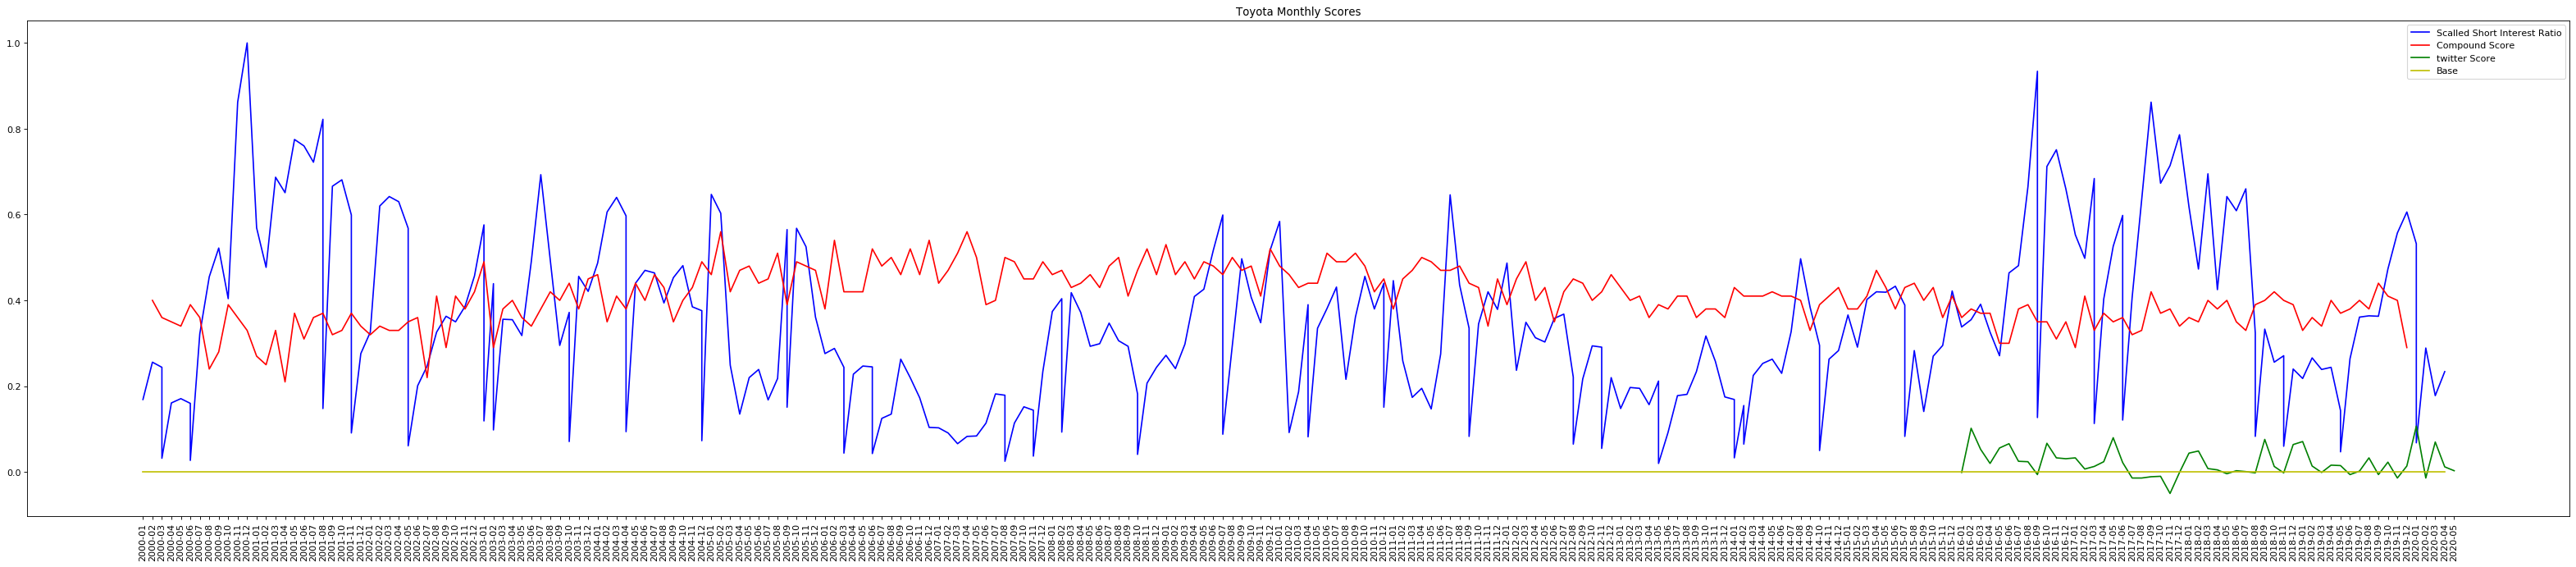

In [30]:
plot_scores('Toyota', x_compound_label_tm, avg_compound_tm, x_short_label_toyota, toyota_scale_avg_month, x_twitter_label_tm, tm_avg_twitter)

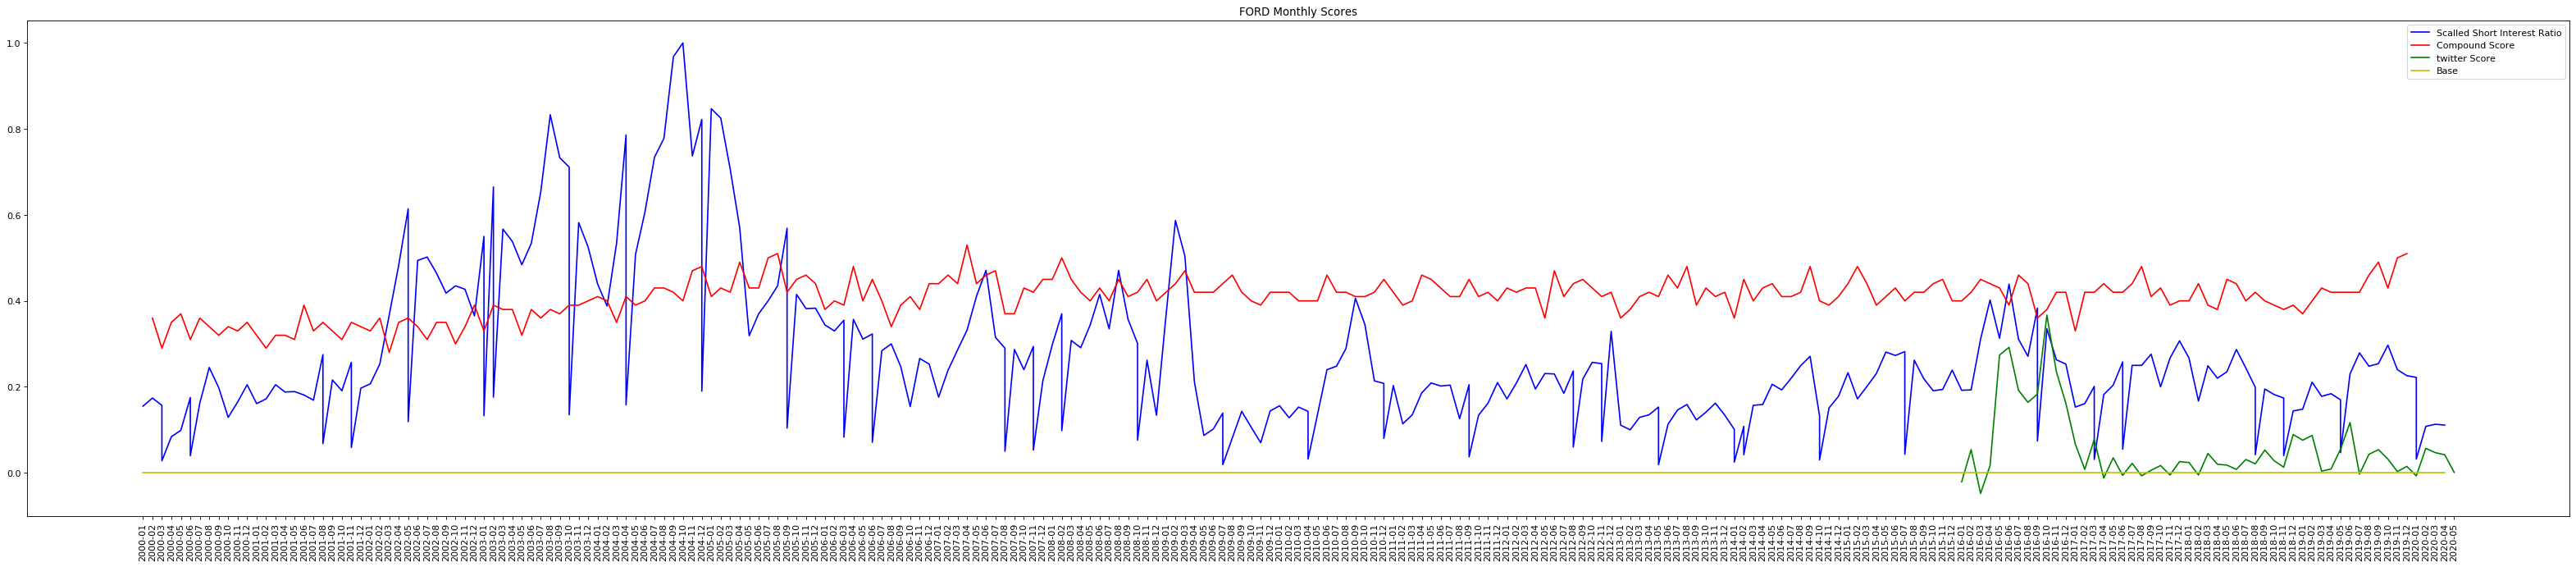

In [31]:
plot_scores('FORD', x_compound_label_f, avg_compound_f, x_short_label_ford, ford_scale_avg_month, x_twitter_label_ford, ford_avg_twitter)

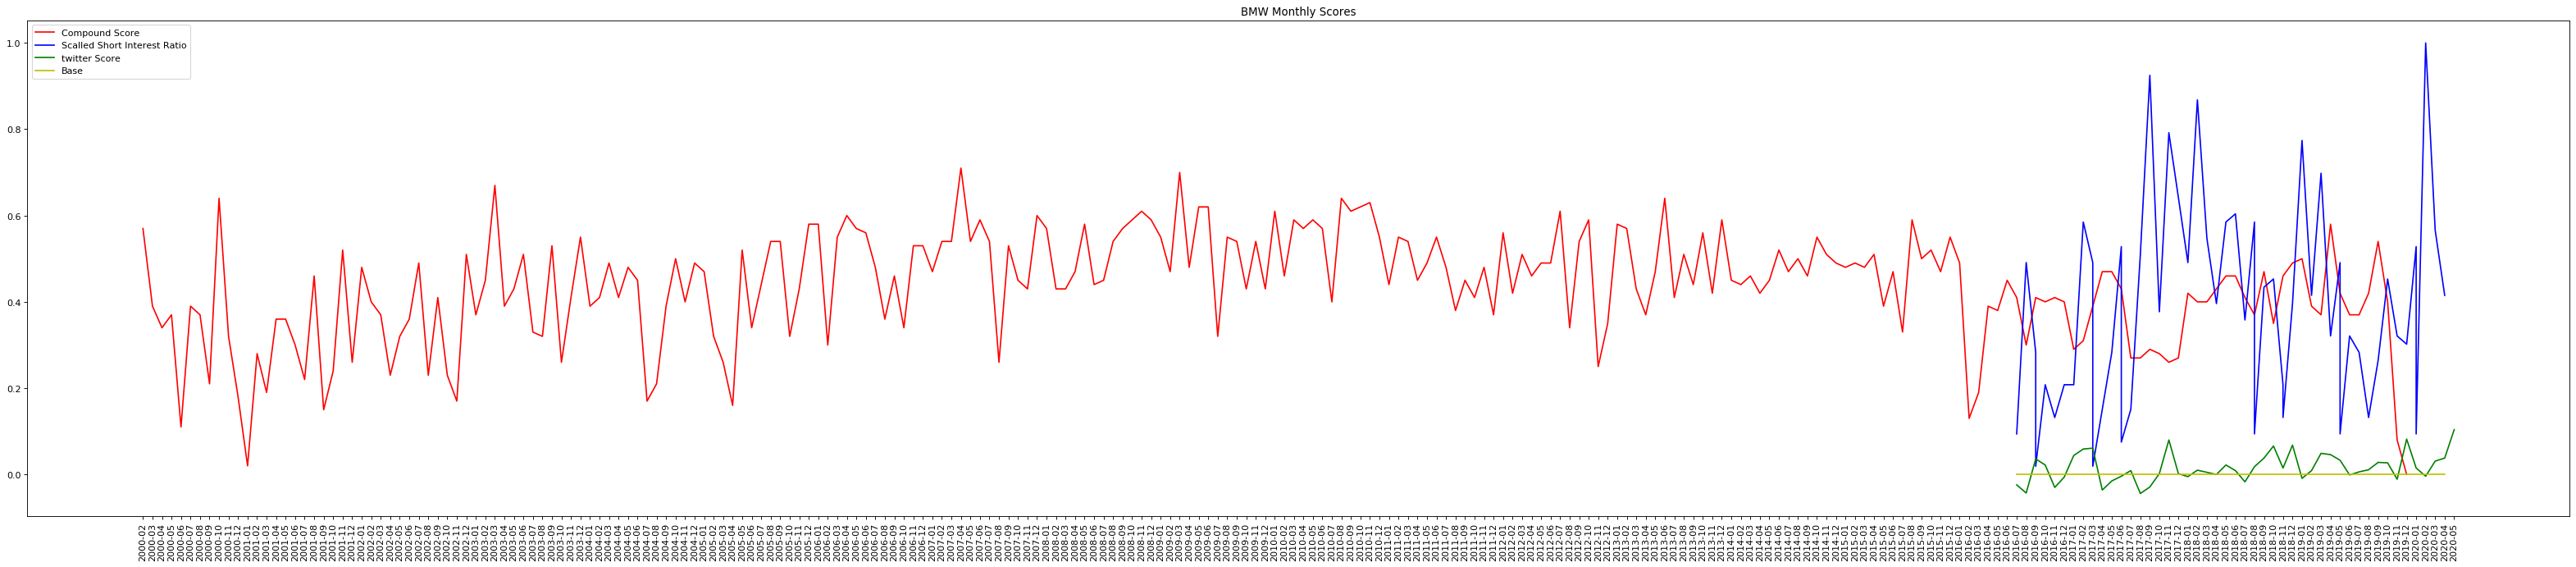

In [34]:
plot_scores('BMW', x_compound_label_bmw, avg_compound_bmw, x_short_label_bmw, bmw_scale_avg_month, x_twitter_label_bmw, bmw_avg_twitter)

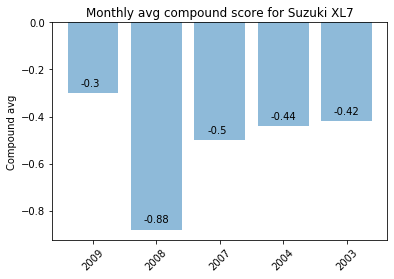

In [16]:
def plot_(objects, y, make, model):
    plt.clf()
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, y, alpha=0.5)
    plt.xticks(y_pos, objects, rotation=45)
    plt.ylabel('Compound avg')
    plt.title('Monthly avg compound score for {} {}'.format(make, model))
    for index, value in enumerate(y):
        plt.text(index-0.2, value+0.03, str(value))
    
    if make not in os.listdir('img'):
        os.mkdir('img/{}'.format(make))
        plt.savefig('img/{}/{}'.format(make, model))
    else:
        plt.savefig('img/{}/{}'.format(make, model))


makes = df_vader['Make'].unique()
def image_generator():
    for make in makes:
        df_temp_make = df_vader_small[df_vader_small['Make']==make]
        models = df_temp_make['Model'].unique()
        for model in models:
            df_temp_model = df_temp_make[df_temp_make['Model']==model]
            count = df_temp_model.groupby(['Year'], as_index=False).count()['neg'].to_list()
            compound_sum = df_temp_model.groupby(['Year'], as_index=False).sum()['Compound'].to_list()
            years = df_temp_model['Year'].unique()
            devide = []
            
            assert len(count) == len(compound_sum)
            for i, j in zip(count, compound_sum):
                devide.append(round(j/i, 2))
            
            plot_(years, devide, make, model)
            
image_generator()
